# Credit Card User Segmentation



### Business Problem

You work as a data scientist at a credit card company. A senior VP is leading an effort to reduce costs associated with signup incentives by offering credit cards with carefully targeted benefits that will attract new cardholders. As a first step, she would like you to examine cardholder data collected over the last 6 months in order to understand the various kinds of users who use the company’s products. She is especially interested in getting an idea of which benefits to associate with each new card offering.


## Step 1: Frame the Problem

Identify the cluster of customer segments and make a data driven recommendations for each customer segment.

### Data: We are given following 18 columns (with 17 behavorial features) in our data with 8950 data entries.

1. CUSTOMER ID: A unique ID for each customer
2. BALANCE: This is the balance amount left on in their credit card account to make purchases.
3. BALANCE_FREQUENCY: How frequently the balance is updated?!
4. PURCHASES: The amount of total purchases customers made in the last 6 months.
5. ONEOFF_PURCHASES: Maximum purchase amount done in one go in the last six months
6. INSTALLMENTS_PURCHASES: The amount of purchase done in installments. 
7. CASH_ADVANCE: Cash in advance given by the user 
8. PURCHASES_FREQUENCY: how frequently the purchases are being made?
9.  ONEOFF_PURCHASES_FREQUENCY: How frequently purchases are happening in one go?
10. PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done?
11. CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
12. CASH_ADVANCE_TRX: No of transactions made with "cash in advance" in the last six months.
13. PURCHASES_TRX: No. of purchase transactions made in the last six months. 
14. CREDIT_LIMIT: Credit limit for the credit card of the customer.
15. PAYMENTS: The amount of Payment made in the last 6 months.
16. MINIMUM_PAYMENTS: Minimum amount of payments made by user.
17. PRC_FULL_PAYMENT: Percentage of full payment paid by user.
18. TENURE: How long since the customer had the credit card.
     

### Hypothesis generation:

- Possible clustering options:  

  -- Based on the credit card tenure  
  -- Low balance or High purchases and high percentage of full payments (Increase credit line)
  -- High cash advances but low purchases (may offer deal with high cash returns)
  -- Oneoff Purchases but no installment purchases (may offer deals with spending high amount)
  -- NO Oneoff Purchases but many installment purchases (may offer deals with spending a certain amount on a regular basis) 
  -- Customers who are spending close to their credit limit (Increase credit line)
 
 
- INSTALLMENTS_PURCHASES is correlated with oneoffpurchases and purchases  
  -- It is equal to Purchases - OneOff_Purchases?  correlated.
  
  
- Possible features:

  -- Average amount spent per transaction as this might tell us if user likes to spend the amount in many small transcations or a few big transactions.  
  -- Average cash withdraw amount  
  -- Measure of how close they are to spending close to their credit card limit -> Credit card limit - total spending on the card 

  

### Install neccessary packages

In [1]:
#Install a package that will allow us to vidualize the missing data values
!pip install -q missingno
import missingno as ms
# Import neccessary packages

import numpy as np # linear algebra
import pandas as pd # data processing

#data visualization
import matplotlib.pyplot as plt 
import seaborn as sns
 
# Algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation

# To ignore any warnings 
import warnings 
warnings.filterwarnings("ignore") 

15


## Step 2: Load/Clean the dataset


In [2]:
data = pd.read_csv("C:/Users/18326/Desktop/MachineLearning/Insight_Project/cc_info.csv")

In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [6]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


#### INSIGHT #1:

1. Credit card tenure varies from 6 to 12 but on average we have a user with 11 year credit card tenure.
2. In terms of purchases, there might be some outliers. Note that the range of the purchases fall between 0 to ~49K where most of this lies between 75th percentile.
3. For most(above 25th percentile) of the credit card, the balance is updated 88%.
4. There seems to be outliers in minimum payments too where the last 25th percentile of the data lies between 795 to 76406.

In [7]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
# Number of rows where Payments is zero is 240.
data.loc[data["PAYMENTS"] == 0].count()


CUST_ID                             240
BALANCE                             240
BALANCE_FREQUENCY                   240
PURCHASES                           240
ONEOFF_PURCHASES                    240
INSTALLMENTS_PURCHASES              240
CASH_ADVANCE                        240
PURCHASES_FREQUENCY                 240
ONEOFF_PURCHASES_FREQUENCY          240
PURCHASES_INSTALLMENTS_FREQUENCY    240
CASH_ADVANCE_FREQUENCY              240
CASH_ADVANCE_TRX                    240
PURCHASES_TRX                       240
CREDIT_LIMIT                        240
PAYMENTS                            240
MINIMUM_PAYMENTS                      0
PRC_FULL_PAYMENT                    240
TENURE                              240
dtype: int64

In [9]:
# Impute the NAN values in minimum payment column by zero for those values where payments is zero. 
data["MINIMUM_PAYMENTS"].loc[data["PAYMENTS"] == 0] = data["MINIMUM_PAYMENTS"].loc[data["PAYMENTS"] == 0].fillna(0)

In [10]:
# Impute the ONLY NAN values in credit limit column by median for those values where TENURE is 6 same as the tenure for the missing value row. 
data["CREDIT_LIMIT"].fillna(data["CREDIT_LIMIT"].loc[data["TENURE"] == 6].median(), inplace = True)

In [11]:
#Drop the remaining 76 Null entries from column "Minimum Payments" (we will come back and rerun the model by replacing this 76 enytries by average value.)
data.dropna(inplace = True)

In [12]:
#Drop the Customer ID to eliminate any categorial vaiable from the data
data.drop("CUST_ID", axis = 1, inplace = True)

In [13]:
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

### Insight 2: Now data is clean with no null values and all numerical values. 
To acheive this we had to drop 73 entries and input the rest by either 0 or mean of the column corresponding to Tenure = 6. 

In [14]:
data.nunique()

BALANCE                             8837
BALANCE_FREQUENCY                     43
PURCHASES                           6159
ONEOFF_PURCHASES                    4003
INSTALLMENTS_PURCHASES              4421
CASH_ADVANCE                        4314
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8638
MINIMUM_PAYMENTS                    8637
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

## Step 3: Analyze the Data

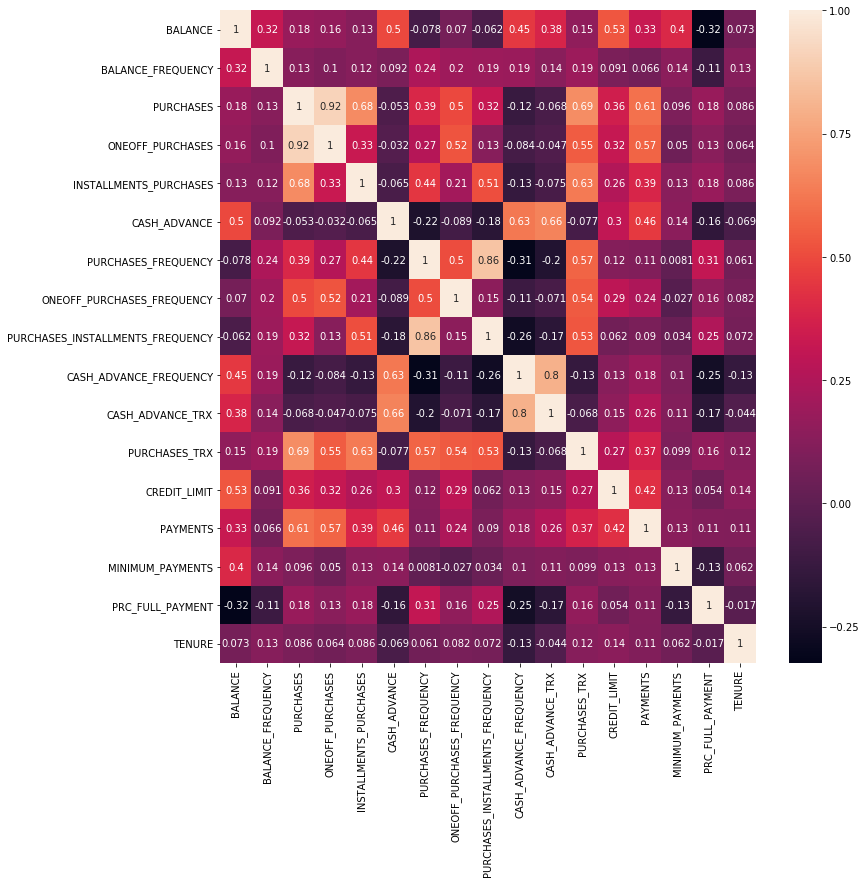

In [15]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),xticklabels=data.columns, yticklabels=data.columns, annot=True)

### Insight 3: Strongly Correlating Variables
--- There is a strong positive correlation between cash advance frequency and cash advance transcation. 
--- There is a strong positive correlation between purchases installments frequency and purchases frequency.
--- There is a strong positive correlation between one off purchases and purchases. 

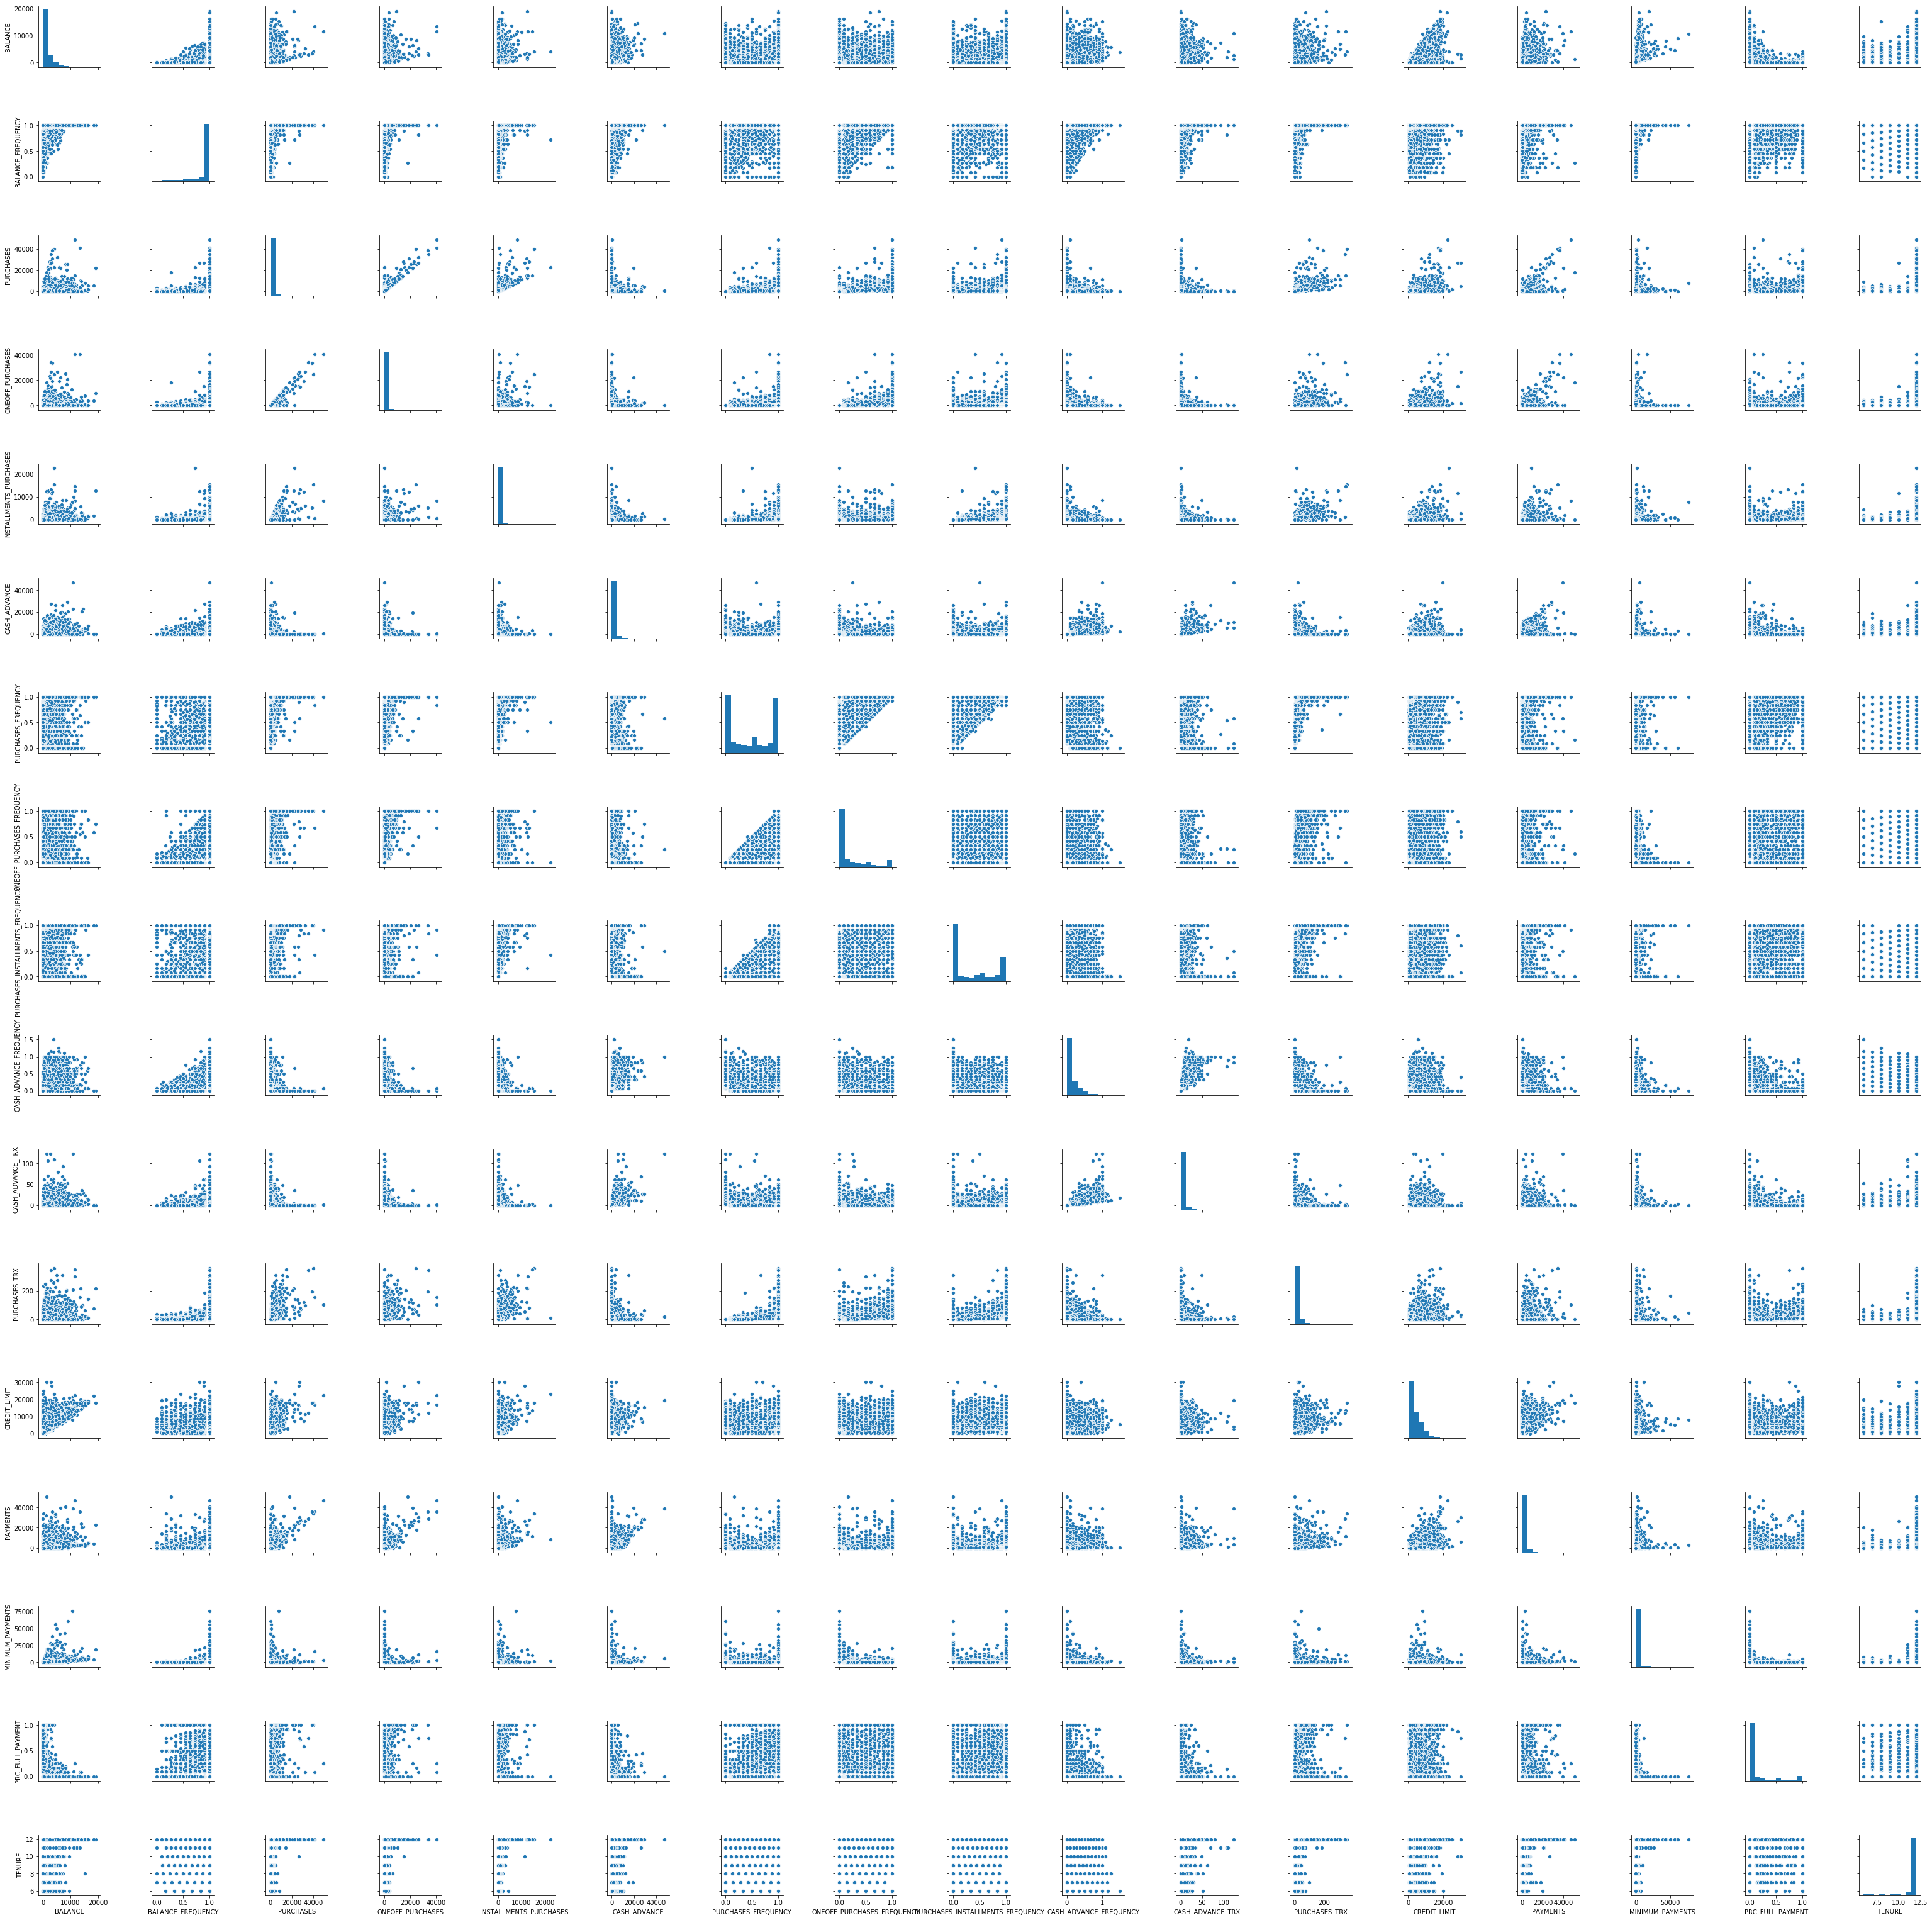

In [16]:
sns.pairplot(data)

[Text(0, 0, 'BALANCE'),
 Text(0, 0, 'BALANCE_FREQUENCY'),
 Text(0, 0, 'PURCHASES'),
 Text(0, 0, 'ONEOFF_PURCHASES'),
 Text(0, 0, 'INSTALLMENTS_PURCHASES'),
 Text(0, 0, 'CASH_ADVANCE'),
 Text(0, 0, 'PURCHASES_FREQUENCY'),
 Text(0, 0, 'ONEOFF_PURCHASES_FREQUENCY'),
 Text(0, 0, 'PURCHASES_INSTALLMENTS_FREQUENCY'),
 Text(0, 0, 'CASH_ADVANCE_FREQUENCY'),
 Text(0, 0, 'CASH_ADVANCE_TRX'),
 Text(0, 0, 'PURCHASES_TRX'),
 Text(0, 0, 'CREDIT_LIMIT'),
 Text(0, 0, 'PAYMENTS'),
 Text(0, 0, 'MINIMUM_PAYMENTS'),
 Text(0, 0, 'PRC_FULL_PAYMENT'),
 Text(0, 0, 'TENURE')]

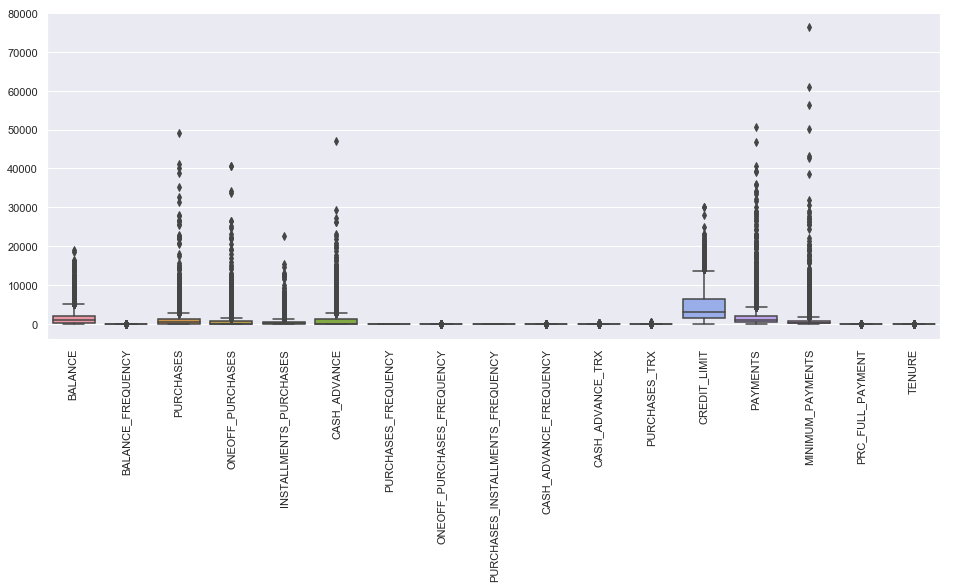

In [17]:
sns.set_style(style = "whitegrid")
sns.set(rc= {"figure.figsize":(16, 6)})
ax = sns.boxplot(data = data)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

### Insight 4: SKEWED DATA
Data is extremely skewed to the right and would need to do normalization to be able to visualize appropriately and work with it effectively. 

In [18]:
#create a data copy and normalize the features
df = data.copy()
df = np.log(1+ df)

In [45]:
#create a new feature to combine the effect of Cash advance and # of cash advance tansaction and same for purchases 
df["CASH_ADVANCE_AVG"] = (df["CASH_ADVANCE"]//df["CASH_ADVANCE_TRX"])
df["PURCHASES_AVG"] = (df["PURCHASES"]//df["PURCHASES_TRX"])

In [46]:
#Important to normalize in order to appropriately use k-means
df_norm = (df-df.mean())/df.std()

In [47]:
df_std = (df-df.min())/(df.max() - df.min())

In [48]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CASH_ADVANCE_AVG,PURCHASES_AVG
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949,NaN,4.0
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949,5.0,NaN
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949,NaN,2.0
3,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,8.922792,0.000000,0.000000,0.000000,2.564949,7.0,10.0
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949,NaN,4.0


[Text(0, 0, 'BALANCE'),
 Text(0, 0, 'BALANCE_FREQUENCY'),
 Text(0, 0, 'PURCHASES'),
 Text(0, 0, 'ONEOFF_PURCHASES'),
 Text(0, 0, 'INSTALLMENTS_PURCHASES'),
 Text(0, 0, 'CASH_ADVANCE'),
 Text(0, 0, 'PURCHASES_FREQUENCY'),
 Text(0, 0, 'ONEOFF_PURCHASES_FREQUENCY'),
 Text(0, 0, 'PURCHASES_INSTALLMENTS_FREQUENCY'),
 Text(0, 0, 'CASH_ADVANCE_FREQUENCY'),
 Text(0, 0, 'CASH_ADVANCE_TRX'),
 Text(0, 0, 'PURCHASES_TRX'),
 Text(0, 0, 'CREDIT_LIMIT'),
 Text(0, 0, 'PAYMENTS'),
 Text(0, 0, 'MINIMUM_PAYMENTS'),
 Text(0, 0, 'PRC_FULL_PAYMENT'),
 Text(0, 0, 'TENURE'),
 Text(0, 0, 'CASH_ADVANCE_AVG'),
 Text(0, 0, 'PURCHASES_AVG')]

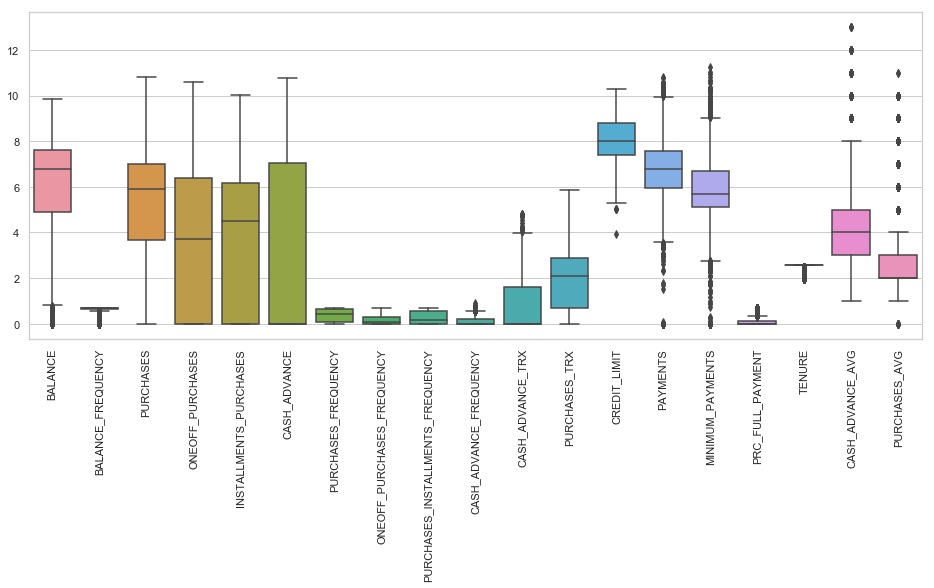

In [49]:
sns.set_style(style = "whitegrid")
ax = sns.boxplot(data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

[Text(0, 0, 'BALANCE'),
 Text(0, 0, 'BALANCE_FREQUENCY'),
 Text(0, 0, 'PURCHASES'),
 Text(0, 0, 'ONEOFF_PURCHASES'),
 Text(0, 0, 'INSTALLMENTS_PURCHASES'),
 Text(0, 0, 'CASH_ADVANCE'),
 Text(0, 0, 'PURCHASES_FREQUENCY'),
 Text(0, 0, 'ONEOFF_PURCHASES_FREQUENCY'),
 Text(0, 0, 'PURCHASES_INSTALLMENTS_FREQUENCY'),
 Text(0, 0, 'CASH_ADVANCE_FREQUENCY'),
 Text(0, 0, 'CASH_ADVANCE_TRX'),
 Text(0, 0, 'PURCHASES_TRX'),
 Text(0, 0, 'CREDIT_LIMIT'),
 Text(0, 0, 'PAYMENTS'),
 Text(0, 0, 'MINIMUM_PAYMENTS'),
 Text(0, 0, 'PRC_FULL_PAYMENT'),
 Text(0, 0, 'TENURE'),
 Text(0, 0, 'CASH_ADVANCE_AVG'),
 Text(0, 0, 'PURCHASES_AVG')]

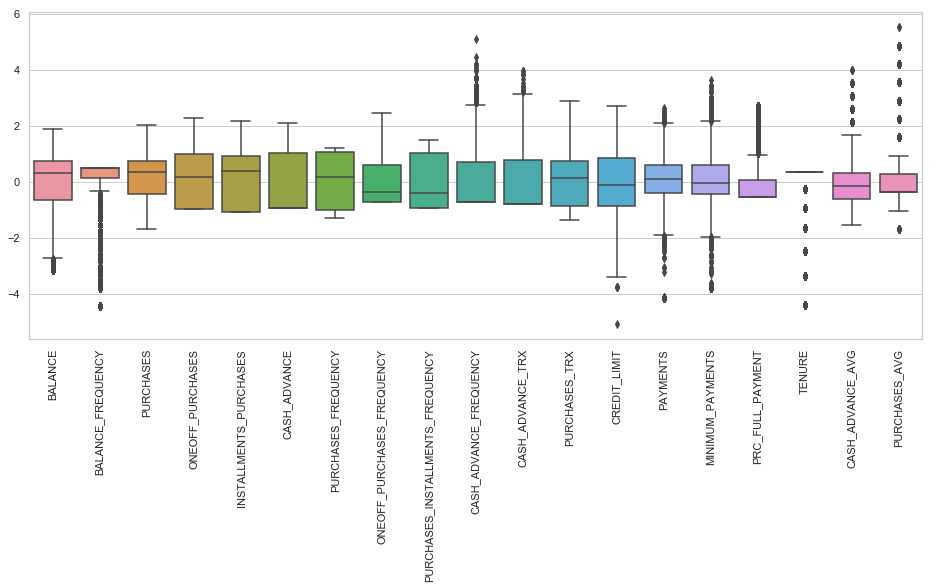

In [50]:
#Boxplot with normalized data - observe the difference
sns.set_style(style = "whitegrid")
ax = sns.boxplot(data = df_norm)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

[Text(0, 0, 'BALANCE'),
 Text(0, 0, 'BALANCE_FREQUENCY'),
 Text(0, 0, 'PURCHASES'),
 Text(0, 0, 'ONEOFF_PURCHASES'),
 Text(0, 0, 'INSTALLMENTS_PURCHASES'),
 Text(0, 0, 'CASH_ADVANCE'),
 Text(0, 0, 'PURCHASES_FREQUENCY'),
 Text(0, 0, 'ONEOFF_PURCHASES_FREQUENCY'),
 Text(0, 0, 'PURCHASES_INSTALLMENTS_FREQUENCY'),
 Text(0, 0, 'CASH_ADVANCE_FREQUENCY'),
 Text(0, 0, 'CASH_ADVANCE_TRX'),
 Text(0, 0, 'PURCHASES_TRX'),
 Text(0, 0, 'CREDIT_LIMIT'),
 Text(0, 0, 'PAYMENTS'),
 Text(0, 0, 'MINIMUM_PAYMENTS'),
 Text(0, 0, 'PRC_FULL_PAYMENT'),
 Text(0, 0, 'TENURE'),
 Text(0, 0, 'CASH_ADVANCE_AVG'),
 Text(0, 0, 'PURCHASES_AVG')]

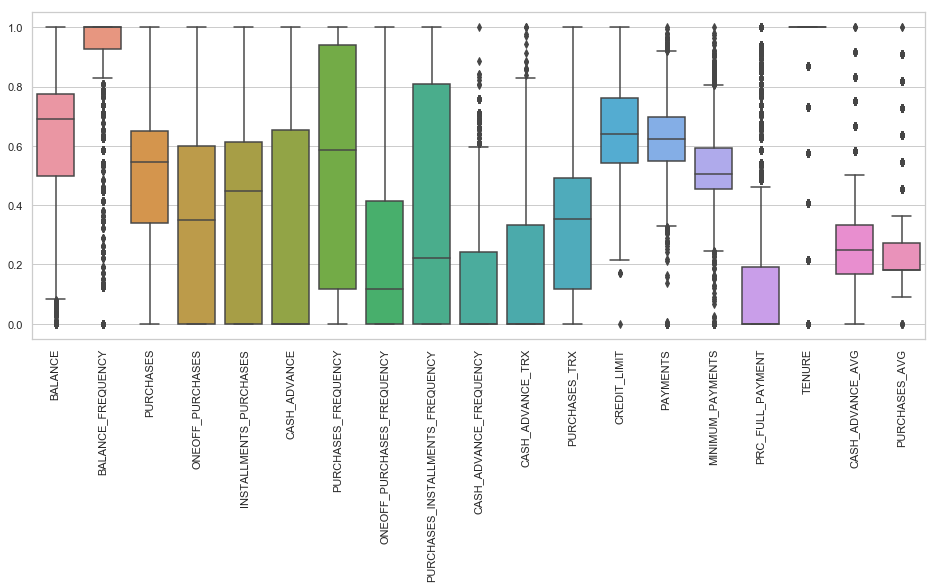

In [51]:
sns.set_style(style = "whitegrid")
ax = sns.boxplot(data = df_std)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

## Step 4: Feature Engineering

In [ ]:
#Check if purchases is the sum of oneoff_prchases and installment purchases
df["PURCHASES_NEW"] = df["ONEOFF_PURCHASES"] + df["INSTALLMENTS_PURCHASES"]
print(all(df["PURCHASES_NEW"] == df["PURCHASES"])) 
print("Purchases are not same as sum of oneoffpurchases and installment purchases")



In [ ]:
df.drop(["PURCHASES_NEW"], axis = 1, inplace = True)

In [37]:
df_std.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CASH_ADVANCE_AVG,PURCHASES_AVG
0,0.379045,0.862497,0.422994,0.000000,0.455879,0.000000,0.222393,0.000000,0.115477,0.000000,0.000000,0.186733,0.466811,0.490324,0.439821,0.000000,1.0,NaN,2.0
1,0.819116,0.932886,0.000000,0.000000,0.000000,0.815075,0.000000,0.000000,0.000000,0.243529,0.333889,0.000000,0.771814,0.767919,0.620654,0.289506,1.0,2.0,NaN
2,0.793799,1.000000,0.615884,0.626611,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.435970,0.782631,0.593925,0.573025,0.000000,1.0,NaN,1.0
3,0.752871,0.710494,0.677125,0.688918,0.000000,0.495472,0.115477,0.115477,0.000000,0.087355,0.143798,0.117816,0.782631,0.000000,0.000000,0.000000,1.0,3.0,5.0
4,0.680676,1.000000,0.262325,0.266894,0.000000,0.000000,0.115477,0.115477,0.000000,0.000000,0.000000,0.117816,0.495375,0.601905,0.489556,0.000000,1.0,NaN,2.0


In [52]:
# Fill the NAN values with zero for values where cash advances and purchases are zero.
df_std = df_std.fillna(0)

In [53]:
df_std.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CASH_ADVANCE_AVG,PURCHASES_AVG
0,0.379045,0.862497,0.422994,0.000000,0.455879,0.000000,0.222393,0.000000,0.115477,0.000000,0.000000,0.186733,0.466811,0.490324,0.439821,0.000000,1.0,0.000000,0.363636
1,0.819116,0.932886,0.000000,0.000000,0.000000,0.815075,0.000000,0.000000,0.000000,0.243529,0.333889,0.000000,0.771814,0.767919,0.620654,0.289506,1.0,0.333333,0.000000
2,0.793799,1.000000,0.615884,0.626611,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.435970,0.782631,0.593925,0.573025,0.000000,1.0,0.000000,0.181818
3,0.752871,0.710494,0.677125,0.688918,0.000000,0.495472,0.115477,0.115477,0.000000,0.087355,0.143798,0.117816,0.782631,0.000000,0.000000,0.000000,1.0,0.500000,0.909091
4,0.680676,1.000000,0.262325,0.266894,0.000000,0.000000,0.115477,0.115477,0.000000,0.000000,0.000000,0.117816,0.495375,0.601905,0.489556,0.000000,1.0,0.000000,0.363636


In [54]:
#Select the first level features without the frequency.
selected_features = ["BALANCE", "ONEOFF_PURCHASES", "INSTALLMENTS_PURCHASES", "CASH_ADVANCE_AVG", "PURCHASES_AVG", "PAYMENTS", "MINIMUM_PAYMENTS", "CREDIT_LIMIT"]
df_std[selected_features].head()

,BALANCE,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE_AVG,PURCHASES_AVG,PAYMENTS,MINIMUM_PAYMENTS,CREDIT_LIMIT
0,0.379045,0.000000,0.455879,0.000000,0.363636,0.490324,0.439821,0.466811
1,0.819116,0.000000,0.000000,0.333333,0.000000,0.767919,0.620654,0.771814
2,0.793799,0.626611,0.000000,0.000000,0.181818,0.593925,0.573025,0.782631
3,0.752871,0.688918,0.000000,0.500000,0.909091,0.000000,0.000000,0.782631
4,0.680676,0.266894,0.000000,0.000000,0.363636,0.601905,0.489556,0.495375


[Text(0, 0, 'BALANCE'),
 Text(0, 0, 'ONEOFF_PURCHASES'),
 Text(0, 0, 'INSTALLMENTS_PURCHASES'),
 Text(0, 0, 'CASH_ADVANCE_AVG'),
 Text(0, 0, 'PURCHASES_AVG'),
 Text(0, 0, 'PAYMENTS'),
 Text(0, 0, 'MINIMUM_PAYMENTS'),
 Text(0, 0, 'CREDIT_LIMIT')]

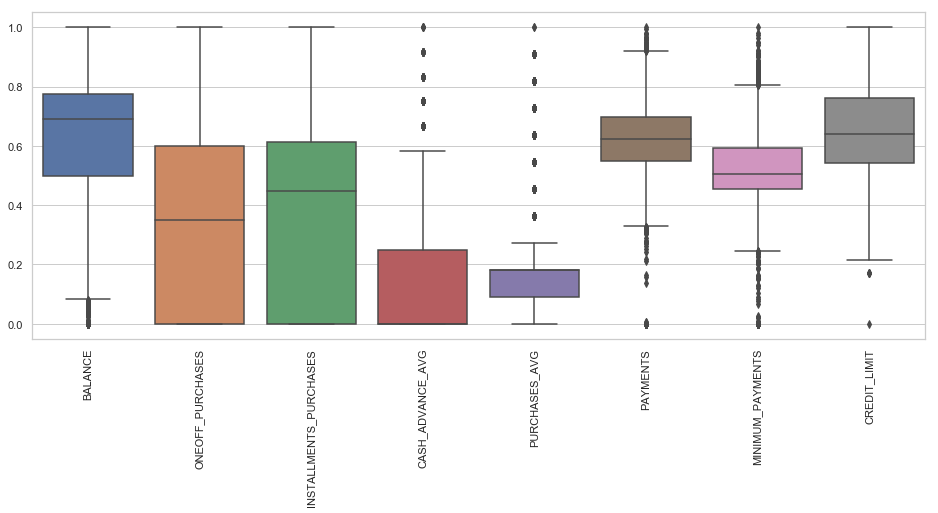

In [55]:
sns.set_style(style = "whitegrid")
ax = sns.boxplot(data = df_std[selected_features])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

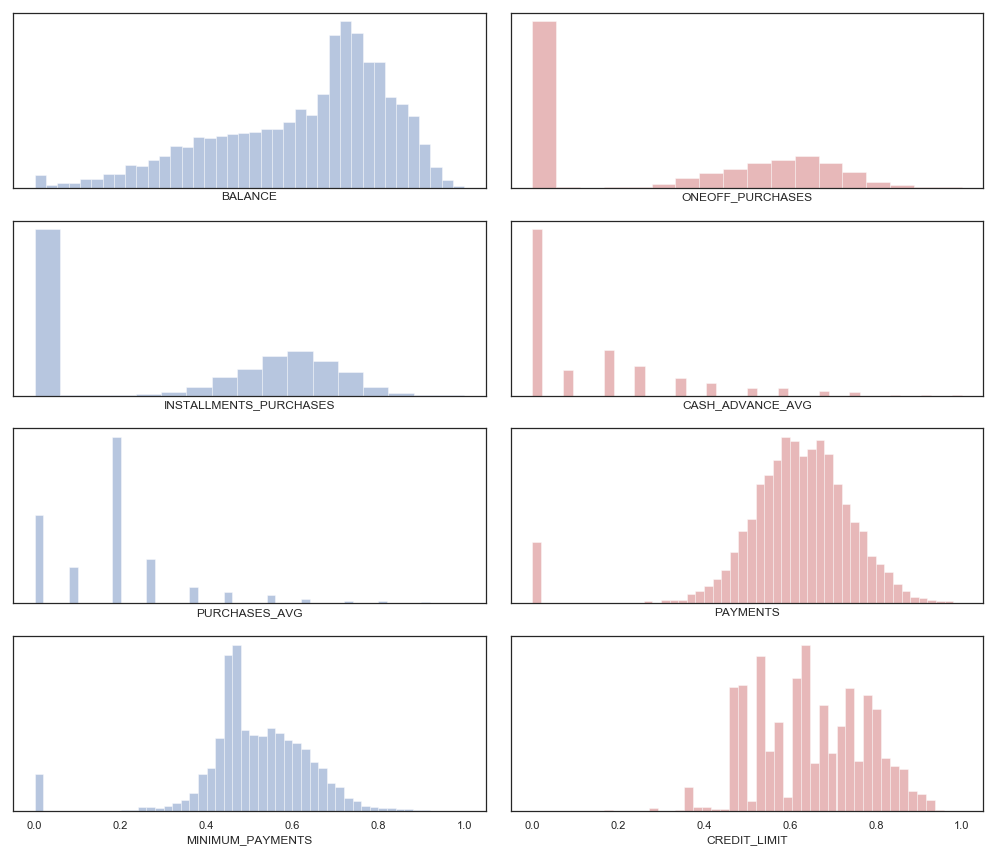

In [56]:
sns.set(style="white", color_codes=True)
#rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(4, 2, figsize=(14, 12), sharex=True)
# sns.despine(left=True)

# Plot a simple histogram with binsize determined automatically
sns.distplot(df_std[selected_features]["BALANCE"], kde=False, color="b", ax=axes[0, 0])

# Plot a simple histogram with binsize determined automatically
sns.distplot(df_std[selected_features]["ONEOFF_PURCHASES"], kde=False, color="r", ax=axes[0, 1])

# Plot a simple histogram with binsize determined automatically
sns.distplot(df_std[selected_features]["INSTALLMENTS_PURCHASES"], kde=False, color="b", ax=axes[1, 0])

# Plot a simple histogram with binsize determined automatically
sns.distplot(df_std[selected_features]["CASH_ADVANCE_AVG"], kde=False, color="r", ax=axes[1, 1])

# Plot a simple histogram with binsize determined automatically
sns.distplot(df_std[selected_features]["PURCHASES_AVG"], kde=False, color="b", ax=axes[2, 0])

# Plot a simple histogram with binsize determined automatically
sns.distplot(df_std[selected_features]["PAYMENTS"], kde=False, color="r", ax=axes[2, 1])

# Plot a simple histogram with binsize determined automatically
sns.distplot(df_std[selected_features]["MINIMUM_PAYMENTS"], kde=False, color="b", ax=axes[3, 0])

# Plot a simple histogram with binsize determined automatically
sns.distplot(df_std[selected_features]["CREDIT_LIMIT"], kde=False, color="r", ax=axes[3, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()


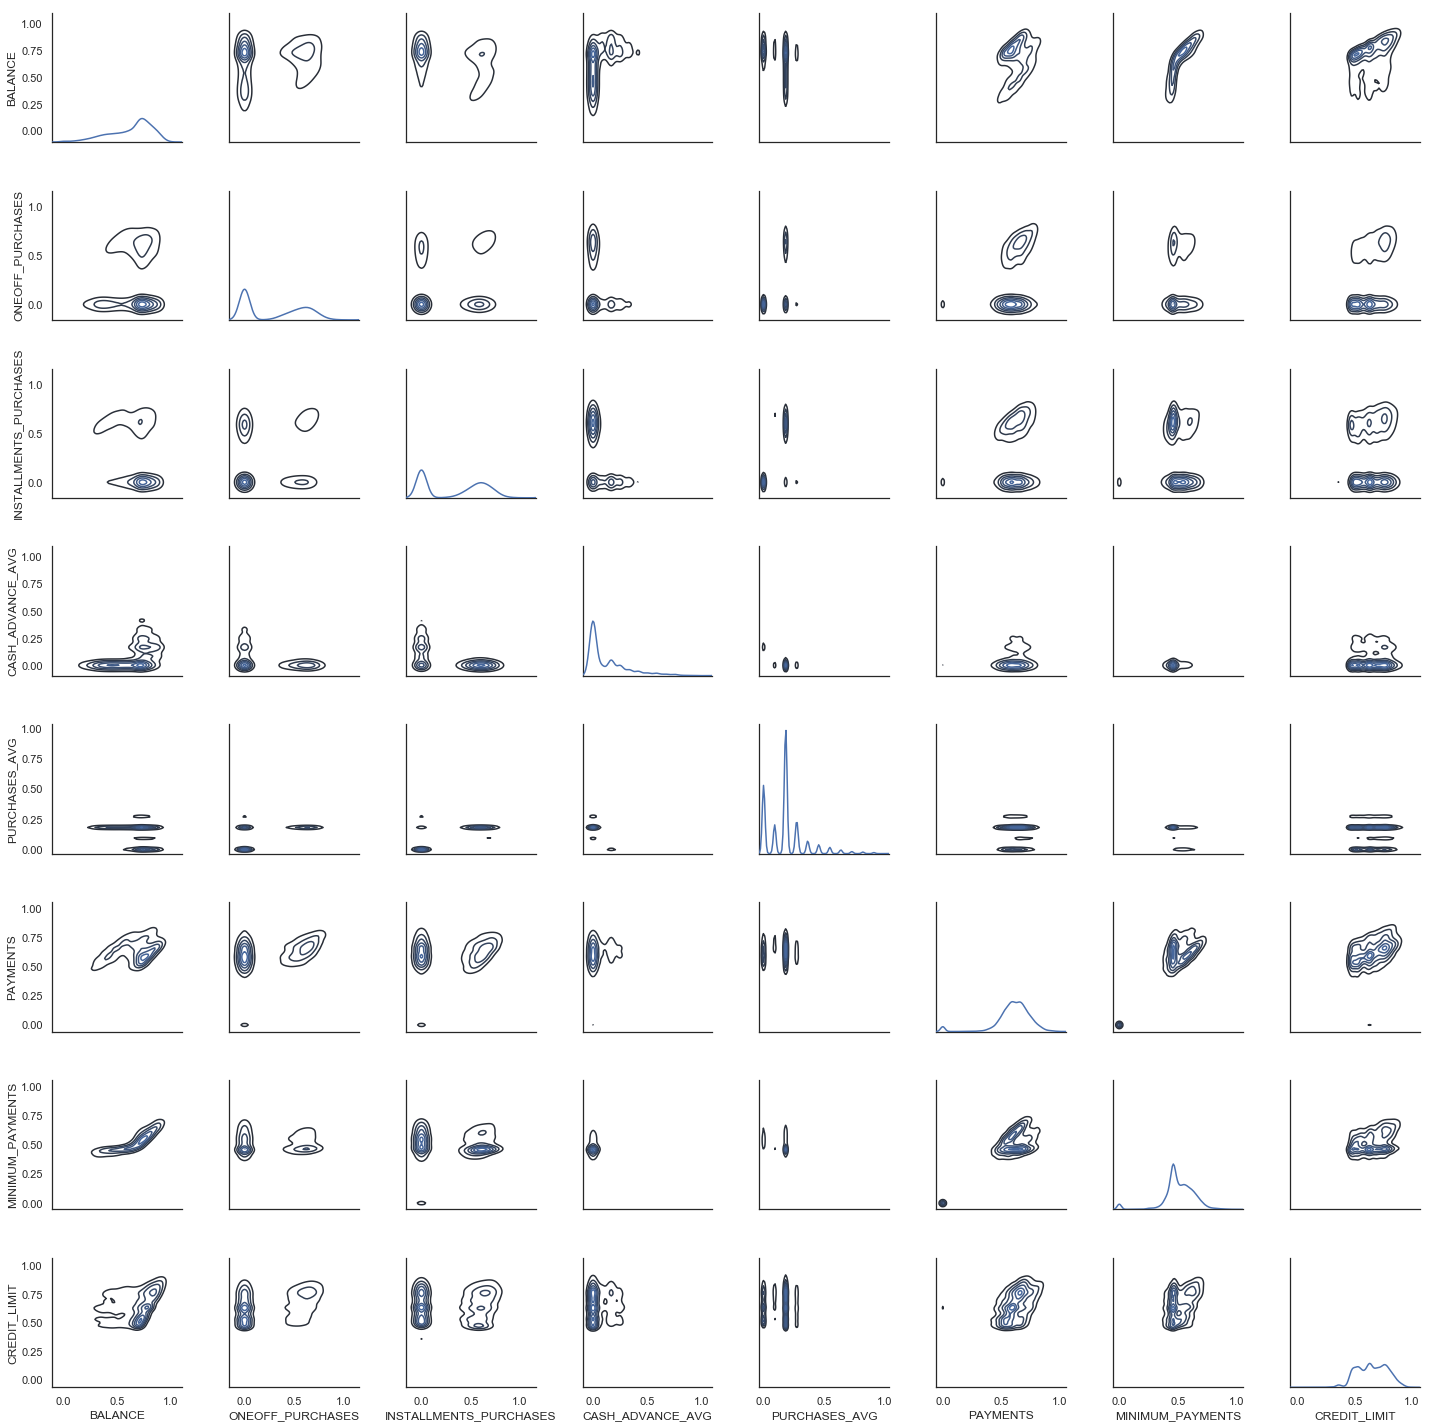

In [57]:
g = sns.PairGrid(df_std[selected_features])
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

### Insight 5:Selected Feature Distribution
  -- Purchases averages and cash advance averages seem to have possible outliers. 
  -- Payments and minimum payments seem to be normally distributed across the users with some possible outliers. 

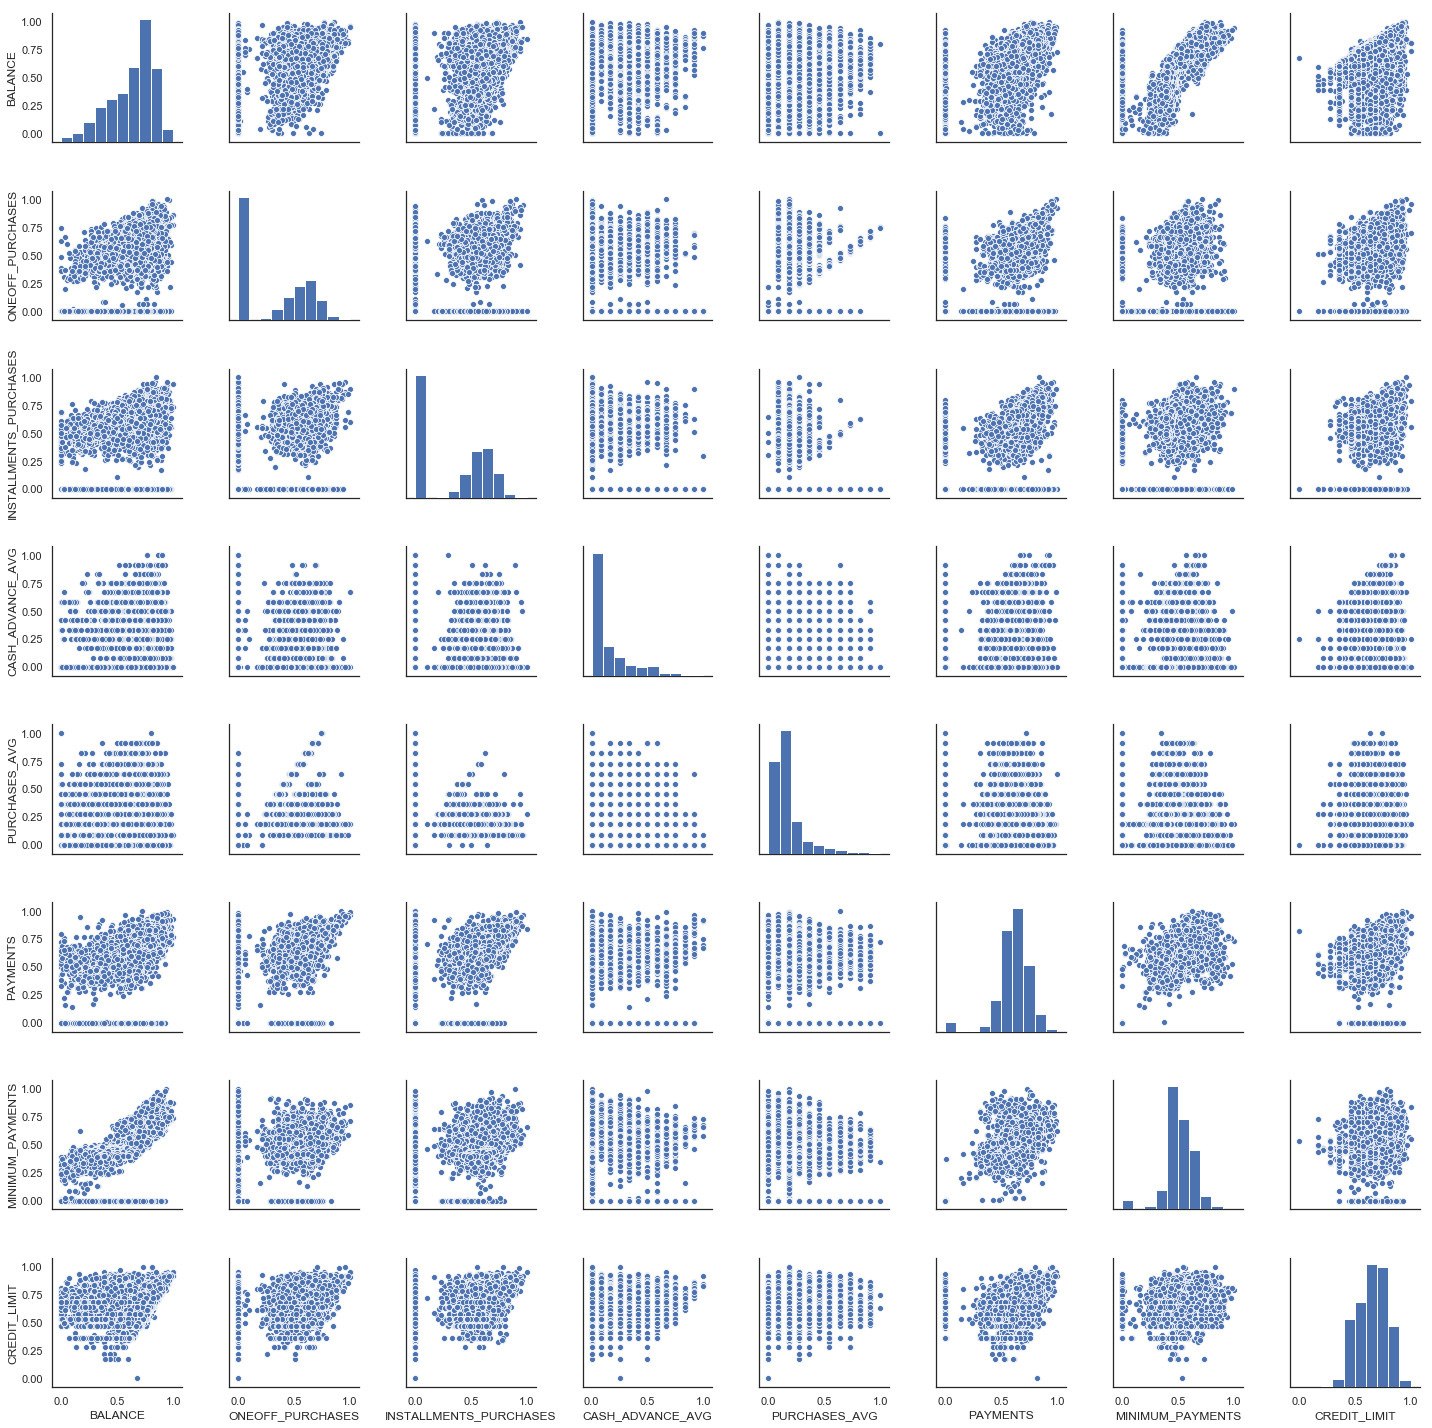

In [58]:
sns.pairplot(df_std[selected_features])

In [61]:
df_std[selected_features].corr()

,BALANCE,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE_AVG,PURCHASES_AVG,PAYMENTS,MINIMUM_PAYMENTS,CREDIT_LIMIT
BALANCE,1.000000,0.173960,-0.112908,0.287046,-0.176868,0.434622,0.718412,0.303002
ONEOFF_PURCHASES,0.173960,1.000000,0.165924,-0.177147,0.383732,0.265341,0.069853,0.284649
INSTALLMENTS_PURCHASES,-0.112908,0.165924,1.000000,-0.313227,0.020407,0.167655,0.014042,0.107290
CASH_ADVANCE_AVG,0.287046,-0.177147,-0.313227,1.000000,-0.239843,0.047696,0.126135,0.007320
PURCHASES_AVG,-0.176868,0.383732,0.020407,-0.239843,1.000000,-0.084746,-0.134066,0.003301
PAYMENTS,0.434622,0.265341,0.167655,0.047696,-0.084746,1.000000,0.642021,0.344750
MINIMUM_PAYMENTS,0.718412,0.069853,0.014042,0.126135,-0.134066,0.642021,1.000000,0.208772
CREDIT_LIMIT,0.303002,0.284649,0.107290,0.007320,0.003301,0.344750,0.208772,1.000000


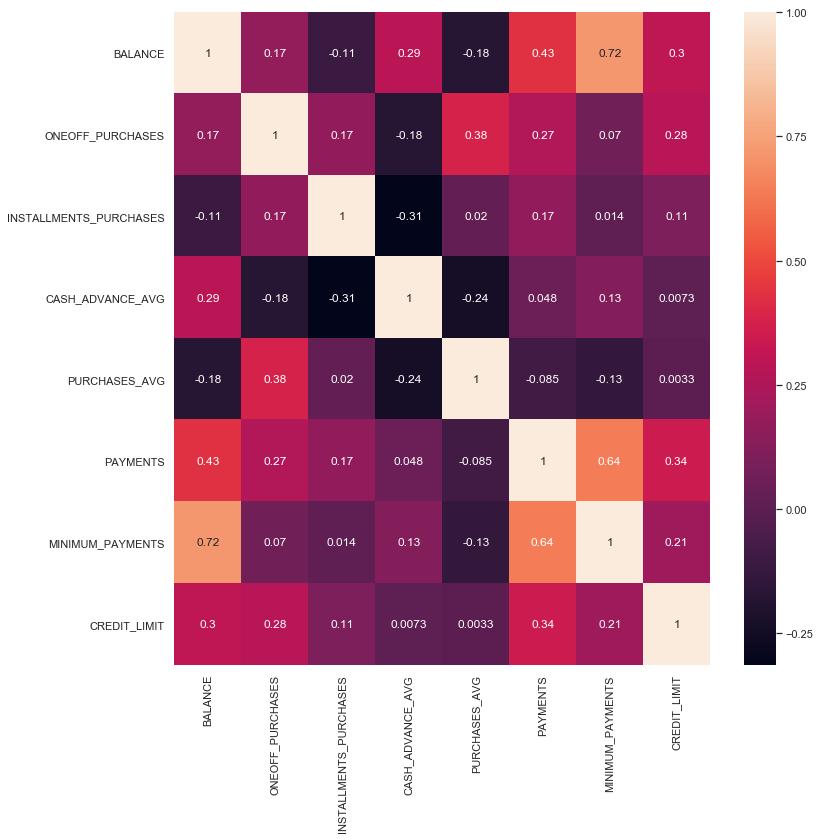

In [62]:
plt.figure(figsize=(12,12))
sns.heatmap(df_std[selected_features].corr(),xticklabels=df_std[selected_features].columns, yticklabels=df_std[selected_features].columns, annot=True)

### Insight 6: Correlation takeaway

Minimum payment seems to be strongly positively correlated with payment and Balance which makes complete senses as per definition. 

## Step 5: Select the Model
As a first step, we will use KMEANS for clustering.

In [107]:
from sklearn.cluster import KMeans
import matplotlib.animation as animation

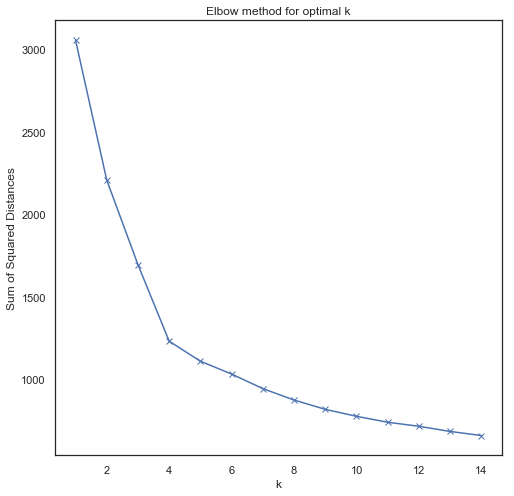

In [65]:
X = np.array(df_std[selected_features])
sumOfSqrdDist = []
K = range(1,15)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans = kmeans.fit(X)
    sumOfSqrdDist.append(kmeans.inertia_)
plt.figure(figsize = (8, 8))    
plt.plot(K, sumOfSqrdDist, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow method for optimal k')
plt.show();

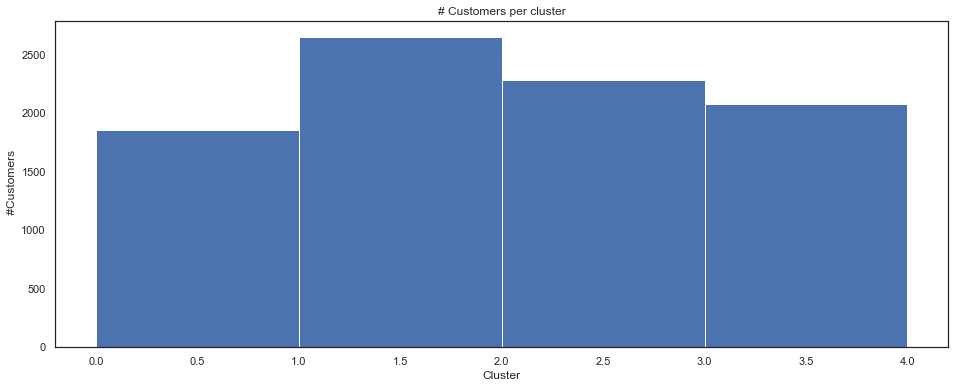

In [68]:
n_cluster = 4
X = np.array(df_std[selected_features])
cluster_labels = KMeans(n_clusters=4, random_state=42).fit_predict(X)

plt.hist(cluster_labels, bins=range(n_cluster+1))
plt.title("# Customers per cluster")
plt.xlabel("Cluster")
plt.ylabel(" #Customers")
plt.show()

df_std[selected_features]['CLUSTER_INDEX'] = cluster_labels


In [103]:
df["CLUSTER_INDEX"] = cluster_labels

In [111]:
df = df.drop(["random"], axis = 1)

In [113]:
df["CLUSTER_INDEX"].head()

0    2
1    3
2    0
3    0
4    0
Name: CLUSTER_INDEX, dtype: int32

In [76]:
df_std[selected_features].head()


,BALANCE,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE_AVG,PURCHASES_AVG,PAYMENTS,MINIMUM_PAYMENTS,CREDIT_LIMIT
0,0.379045,0.000000,0.455879,0.000000,0.363636,0.490324,0.439821,0.466811
1,0.819116,0.000000,0.000000,0.333333,0.000000,0.767919,0.620654,0.771814
2,0.793799,0.626611,0.000000,0.000000,0.181818,0.593925,0.573025,0.782631
3,0.752871,0.688918,0.000000,0.500000,0.909091,0.000000,0.000000,0.782631
4,0.680676,0.266894,0.000000,0.000000,0.363636,0.601905,0.489556,0.495375


In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('CASH_ADVANCE_AVG')
plt.ylabel('CREDIT_LIMIT')
plt.legend()
plt.show()

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('ONEOFF_PURCHASES')
plt.ylabel('MINIMUM_PAYMENTS')
plt.legend()
plt.show()

In [ ]:
print(cluster_labels)

In [ ]:
kmeans.cluster_centers_

In [ ]:
df[selected_features]['CLUSTER_INDEX'] = cluster_labels
print(classification_report(df[selected_features]['CLUSTER_INDEX'], kmeans.labels_))

## Step 6: Conclusion

#### We used k-means clustering and found that there are 4 groups in which we could segment our credit card user population. Also, we came up with the classification strategy from business standpoint for each along with the marketing strategy to keep the customers from each group engaged.  ####

<span style="color:blue">  1. Transactors (37%)  </span> 

Charactertistics:   
a. Low balance relative to credit limit  
b. Low cash advance  
c. High full payment percentage   

Marketing Strategy:   
Offer high cash back to encourage more purchase transactions

<span style="color:blue">2. Revolvers (35%)  </span> 

Charactertistics:   

a. Does not make tons of purchases  
b. balance is high relative to credit limit and is rarely paid off in full

Marketing Strategy:  
low APR in the first 12 months but return to the regular level after


<span style="color:blue">3. High Cash Balancer (20%) </span> 
Charactertistics:  

a. Very high cash advance transactions and balance  
b. low full payment rate

Marketing Strategy:  

low cash balance fee and cash advance APR in the first 12 month.

<span style="color:blue">4. Prime Customers (8%) </span> 

Charactertistics  
a. High credit limit  
b. Frequent and large purchaser 
c. High full payment rate  

Marketing Strategy:    
High credit limit and additional benefit such as travel reward, premium club member, vip lounge at the airport
Can charge a higher annual fee





